In [12]:
# import the necessary packages
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os

In [11]:
import tensorflow as tf
import keras
print(tf.__version__)
print(keras.__version__)

2.3.0
2.2.4


In [2]:
INIT_LR = 1e-4
EPOCHS = 20
BS = 32

DIRECTORY = r"C:\Users\Kushagra\Desktop\Projects\Face-Mask-Detection-master\Face-Mask-Detection-master\dataset"
CATEGORIES = ["with_mask", "without_mask"]

In [13]:
data = []
labels = []

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
        image = img_to_array(image)
        image = preprocess_input(image)

        data.append(image)
        labels.append(category)

C:\Users\Kushagra\Anaconda3\envs\py3.6-TF2.3\lib\site-packages\PIL\Image.py:961: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Lets check what is it in our data and labels

In [18]:
print(data[0])
print(labels[0])


[[[-0.45098037 -0.49019605 -0.44313723]
  [-0.45098037 -0.49019605 -0.44313723]
  [-0.45098037 -0.49019605 -0.44313723]
  ...
  [-0.41176468 -0.62352943 -0.75686276]
  [-0.41176468 -0.62352943 -0.75686276]
  [-0.41176468 -0.62352943 -0.75686276]]

 [[-0.45098037 -0.49019605 -0.44313723]
  [-0.45098037 -0.49019605 -0.44313723]
  [-0.45098037 -0.49019605 -0.44313723]
  ...
  [-0.41176468 -0.62352943 -0.75686276]
  [-0.41176468 -0.62352943 -0.75686276]
  [-0.41176468 -0.62352943 -0.75686276]]

 [[-0.3960784  -0.45098037 -0.3960784 ]
  [-0.3960784  -0.45098037 -0.3960784 ]
  [-0.3960784  -0.45098037 -0.3960784 ]
  ...
  [-0.45098037 -0.62352943 -0.8039216 ]
  [-0.45098037 -0.62352943 -0.8039216 ]
  [-0.45098037 -0.62352943 -0.8039216 ]]

 ...

 [[-0.46666664 -0.67058825 -0.8039216 ]
  [-0.46666664 -0.67058825 -0.8039216 ]
  [-0.46666664 -0.67058825 -0.8039216 ]
  ...
  [-0.3490196  -0.52156866 -0.6313726 ]
  [-0.3490196  -0.52156866 -0.6313726 ]
  [-0.3490196  -0.52156866 -0.6313726 ]]

 [

As we can see that the data contains the converted image to array i.e as pixel values and label contain its value, i.e with_mask, since our pc recognize only numerical value we gonna one hot enode the labels values.

In [17]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
data = np.array(data,dtype="float32")
labels = np.array(labels)

In [19]:
X_train,X_test,y_train,y_test = train_test_split(data,labels,test_size = 0.2
                                                 ,stratify=labels,
                                                random_state = 42)

In [20]:
aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")


In [21]:
basemodel = MobileNetV2(weights='imagenet',include_top=False,
                       input_tensor=Input(shape=(224,224,3)))

9412608/9406464 [==============================] - 15s 2us/step


In [24]:
hmodel = basemodel.output
hmodel = AveragePooling2D(pool_size = (7,7))(hmodel)
hmodel = Flatten(name="flatten")(hmodel)
hmodel = Dense(128,activation='relu')(hmodel)
hmodel = Dropout(0.5)(hmodel)
hmodel = Dense(2,activation='softmax')(hmodel)
model = Model(inputs=basemodel.input,outputs=hmodel)

In [26]:
for layer in basemodel.layers:
    layer.trainable=False
opt = Adam(learning_rate=INIT_LR,decay = INIT_LR/EPOCHS)
model.compile(loss='binary_crossentropy',optimizer=opt,
             metrics=['accuracy'])

In [28]:
history = model.fit(
            aug.flow(X_train,y_train,batch_size=BS),
            steps_per_epoch=len(X_train)//BS,
            validation_data=(X_test,y_test),
            validation_steps=len(X_test)//BS,
            epochs=EPOCHS)

Epoch 1/20
95/95 [==============================] - 86s 901ms/step - loss: 0.3154 - accuracy: 0.8593 - val_loss: 0.0808 - val_accuracy: 0.9857
Epoch 2/20
95/95 [==============================] - 88s 930ms/step - loss: 0.1063 - accuracy: 0.9631 - val_loss: 0.0521 - val_accuracy: 0.9883
Epoch 3/20
95/95 [==============================] - 98s 1s/step - loss: 0.0750 - accuracy: 0.9759 - val_loss: 0.0413 - val_accuracy: 0.9896
Epoch 4/20
95/95 [==============================] - 110s 1s/step - loss: 0.0668 - accuracy: 0.9776 - val_loss: 0.0369 - val_accuracy: 0.9909
Epoch 5/20
95/95 [==============================] - 100s 1s/step - loss: 0.0544 - accuracy: 0.9819 - val_loss: 0.0355 - val_accuracy: 0.9883
Epoch 6/20
95/95 [==============================] - 87s 911ms/step - loss: 0.0509 - accuracy: 0.9825 - val_loss: 0.0331 - val_accuracy: 0.9883
Epoch 7/20
95/95 [==============================] - 87s 917ms/step - loss: 0.0420 - accuracy: 0.9852 - val_loss: 0.0299 - val_accuracy: 0.9883
Epoch 

In [29]:
pred = model.predict(X_test,batch_size=BS)
predict = np.argmax(pred,axis=1)
print(classification_report(y_test.argmax(axis=1),predict,
                           target_names=lb.classes_))

              precision    recall  f1-score   support

   with_mask       0.99      0.99      0.99       383
without_mask       0.99      0.99      0.99       384

    accuracy                           0.99       767
   macro avg       0.99      0.99      0.99       767
weighted avg       0.99      0.99      0.99       767



In [30]:
model.save("mask_detector.")

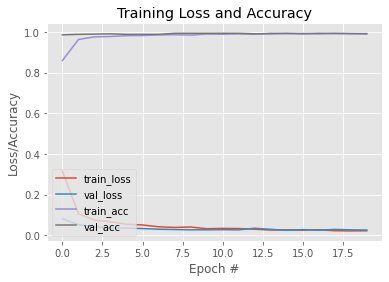

In [32]:
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")